<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

I am engaged by a hotel in Singapore to analyse how rainfall in singapore impacts the hotel business. As it is very easy now to check the upcoming weather when planning a holiday, during the rainy season, tourists might be less inclined to travel to Singapore, resulting in less business for the hotel. With my findings, the hotel hopes to be able to allocate their resources better in different periods of the year in order to maximise profits.

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

External data: hotel.csv. This dataset reflects the the monthly revenue and occupancy of hotel rooms in singapore from the January 2008 to December 2023  

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def find_mean(values):
    try:
        numeric_values = pd.to_numeric(values, errors='coerce')  # Convert to numeric, NaN for non-numeric
        total = numeric_values.sum()
        count = numeric_values.count()
        return total / count if count > 0 else None
    except Exception as e:
        print(f"Error in find_mean: {e}")
        print(f"Problematic values: {values}")
        return None



        

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def find_sd(values):
    try:
        numeric_values = pd.to_numeric(values, errors='coerce')  # Convert to numeric, NaN for non-numeric
        mean1 = find_mean(numeric_values)
        sum_squared_diff = ((numeric_values - mean1)**2).sum()
        variance = sum_squared_diff / numeric_values.count()
        standard_deviation = variance**0.5
        return standard_deviation
    except Exception as e:
        print(f"Error in find_sd: {e}")
        print(f"Problematic values: {values}")
        return None
    




--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [3]:
# Imports:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  


## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook. #DONE
2. Check for missing values and datatype. #DONE
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3. #DONE
6. Fix any incorrect data types found in step 5. #DONE
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns. #DONE
    - Column names should be all lowercase. 
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed). #DONE
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [4]:
# Code:
#`rainfall-monthly-number-of-rain-days.csv`
#`rainfall-monthly-total.csv`
rf_monthly_rain_days = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv', header = 0)
rf_monthly_total = pd.read_csv('../data/rainfall-monthly-total.csv')
hotel2 = pd.read_csv('../data/hotel2.csv')
#visitor = pd.read_csv('../data/visitor.csv')
print (hotel2.head())
print('---------------------------------------------------------------------')
#hotel.iloc[0,]
print(rf_monthly_rain_days.head())



                                         Data Series  2023 Dec  2023 Nov  \
0              Hotel Room Revenue (Thousand Dollars)  412790.7  406655.7   
1                Standard Average Room Rate (Dollar)     286.4     276.5   
2  Average Room Rate - Hotel With 100 Rooms And L...     153.6     153.7   
3  Average Room Rate - Hotel With 101 - 299 Rooms...     277.7     263.0   
4  Average Room Rate - Hotel With 300 Or More Roo...     308.0     298.2   

   2023 Oct  2023 Sep  2023 Aug  2023 Jul  2023 Jun  2023 May  2023 Apr  ...  \
0  409018.8  492763.2  454420.8  484097.4  383010.3  397671.9  365370.3  ...   
1     277.4     325.9     286.0     292.0     270.0     272.6     272.8  ...   
2     157.0     184.8     165.7     172.7     158.9     162.9     165.6  ...   
3     266.1     313.0     274.8     287.5     260.5     263.0     273.0  ...   
4     297.3     349.4     306.8     309.1     287.5     290.4     287.6  ...   

   2008 Oct  2008 Sep  2008 Aug  2008 Jul  2008 Jun  2008 May 

In [5]:
# Code:
print (rf_monthly_rain_days.head())
print('-------------------')
#print (rf_monthly_total.head())
print('-------------------')
print(hotel2.head()) #if my first 5 rows are empty/not the actual data set, do i need to change the head() to reflect the actual first 5 rows of the data?
print('-------------------')
#print(visitor.head())

     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10
-------------------
-------------------
                                         Data Series  2023 Dec  2023 Nov  \
0              Hotel Room Revenue (Thousand Dollars)  412790.7  406655.7   
1                Standard Average Room Rate (Dollar)     286.4     276.5   
2  Average Room Rate - Hotel With 100 Rooms And L...     153.6     153.7   
3  Average Room Rate - Hotel With 101 - 299 Rooms...     277.7     263.0   
4  Average Room Rate - Hotel With 300 Or More Roo...     308.0     298.2   

   2023 Oct  2023 Sep  2023 Aug  2023 Jul  2023 Jun  2023 May  2023 Apr  ...  \
0  409018.8  492763.2  454420.8  484097.4  383010.3  397671.9  365370.3  ...   
1     277.4     325.9     286.0     292.0     270.0     272.6     272.8  ...   
2     157.0     184.8     165.7     172.7     158.9     162.9     165.6  ...   
3     266

In [6]:
#missing data and check datatype 
rf_monthly_rain_days.info()
print('---------------------------------------------')
#rf_monthly_total.info()
#print('---------------------------------------------')
hotel2.info()
print('---------------------------------------------------')
#print(hotel.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Columns: 193 entries, Data Series to 2008 Jan
dtypes: float64(192), object(1)
memory usage: 16.7+ KB
---------------------------------------------------


In [7]:
#check datatype
print (hotel2.columns.dtype)
print (rf_monthly_rain_days.columns.dtype)

object
object


In [8]:
# drop monthly rainy days until jan 2008 
print (rf_monthly_rain_days.iloc[0])
rfmrd_to_drop = rf_monthly_rain_days.iloc[312:]
rfmrd_dropped = rfmrd_to_drop.reset_index(drop= True)
rfmrd_dropped.to_csv('rfmrd_dropped.csv',index = False)
print(rfmrd_dropped.head())
rfmrd_dropped

month               1982-01
no_of_rainy_days         10
Name: 0, dtype: object
     month  no_of_rainy_days
0  2008-01                19
1  2008-02                 8
2  2008-03                16
3  2008-04                13
4  2008-05                11


,month,no_of_rainy_days
0,2008-01,19
1,2008-02,8
2,2008-03,16
3,2008-04,13
4,2008-05,11
...,...,...
171,2022-04,18
172,2022-05,12
173,2022-06,17
174,2022-07,16


In [9]:
# transposing monthly rainy days 
#rfmrd_to_transpose = pd.read_csv('rfmrd_dropped.csv')
rfmrd_to_transpose = rfmrd_dropped.transpose() 
#rfmrd_to_transpose = rfmrd_to_transpose.drop(rfmrd_to_transpose.index[0])
#print(rfmrd_to_transpose.head())
rfmrd_transposed = rfmrd_to_transpose
rfmrd_transposed

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
month,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,...,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08
no_of_rainy_days,19,8,16,13,11,12,15,18,18,19,...,23,15,9,16,21,18,12,17,16,15


In [10]:
#reversing order of hotel2
first_column = hotel2.iloc[:,0]
hotel_reversed = hotel2.iloc[:,::-1]
last_column = hotel_reversed.columns[-1]
columns_order = [last_column] + [col for col in hotel_reversed if col != last_column]
hotel3 = hotel2[columns_order]
hotel3


,Data Series,2008 Jan,2008 Feb,2008 Mar,2008 Apr,2008 May,2008 Jun,2008 Jul,2008 Aug,2008 Sep,...,2023 Mar,2023 Apr,2023 May,2023 Jun,2023 Jul,2023 Aug,2023 Sep,2023 Oct,2023 Nov,2023 Dec
0,Hotel Room Revenue (Thousand Dollars),176098.3,171955.1,187570.5,184276.3,180126.8,177628.7,180123.9,166743.0,194819.3,...,363548.9,365370.3,397671.9,383010.3,484097.4,454420.8,492763.2,409018.8,406655.7,412790.7
1,Standard Average Room Rate (Dollar),235.9,254.3,237.2,251.6,244.2,245.1,236.6,230.5,298.6,...,265.8,272.8,272.6,270.0,292.0,286.0,325.9,277.4,276.5,286.4
2,Average Room Rate - Hotel With 100 Rooms And L...,110.0,104.5,103.1,105.7,105.0,106.2,110.8,108.8,128.3,...,157.0,165.6,162.9,158.9,172.7,165.7,184.8,157.0,153.7,153.6
3,Average Room Rate - Hotel With 101 - 299 Rooms...,201.1,204.7,194.5,200.5,197.2,197.4,202.6,198.2,231.9,...,270.9,273.0,263.0,260.5,287.5,274.8,313.0,266.1,263.0,277.7
4,Average Room Rate - Hotel With 300 Or More Roo...,252.2,277.6,256.9,274.2,265.4,266.9,252.8,246.0,323.1,...,279.7,287.6,290.4,287.5,309.1,306.8,349.4,297.3,298.2,308.0
5,Standard Average Hotel Occupancy Rate (Per Cent),84.2,79.0,86.3,83.0,81.1,81.4,84.4,79.8,73.8,...,79.4,77.6,80.1,80.5,89.9,85.9,82.1,77.6,78.9,74.8
6,Average Hotel Occupancy Rate - Hotel With 100 ...,81.1,78.6,82.0,80.5,79.3,79.9,81.0,74.9,67.6,...,80.9,78.7,80.2,79.0,88.2,85.4,78.5,73.7,76.5,73.6
7,Average Hotel Occupancy Rate - Hotel With 101 ...,80.9,78.3,83.8,80.0,78.5,79.9,81.6,76.6,68.0,...,78.3,79.8,81.0,81.8,89.9,86.4,84.2,80.4,81.4,78.0
8,Average Hotel Occupancy Rate - Hotel With 300 ...,85.1,79.2,87.2,83.8,81.8,81.9,85.2,80.9,75.5,...,79.6,76.8,79.8,80.4,90.2,85.8,81.9,77.2,78.5,74.0
9,Gross Lettings (Room-Nights) (Number),745964.0,667755.0,779884.0,722829.0,730766.0,714293.0,761225.0,723528.0,652343.0,...,1367211.0,1339115.0,1458040.0,1418294.0,1642826.0,1587630.0,1511550.0,1474176.0,1469604.0,1441003.0


In [11]:
#drop hotel after aug 2022 
hotel_to_drop = hotel3.iloc[:,:-16]
hotel4 = hotel_to_drop.reset_index(drop= True)
hotel4


,Data Series,2008 Jan,2008 Feb,2008 Mar,2008 Apr,2008 May,2008 Jun,2008 Jul,2008 Aug,2008 Sep,...,2021 Nov,2021 Dec,2022 Jan,2022 Feb,2022 Mar,2022 Apr,2022 May,2022 Jun,2022 Jul,2022 Aug
0,Hotel Room Revenue (Thousand Dollars),176098.3,171955.1,187570.5,184276.3,180126.8,177628.7,180123.9,166743.0,194819.3,...,101263.9,131882.5,102164.8,107563.2,154392.1,181792.1,231967.7,285411.8,316633.3,312508.1
1,Standard Average Room Rate (Dollar),235.9,254.3,237.2,251.6,244.2,245.1,236.6,230.5,298.6,...,174.0,223.8,184.9,193.1,192.3,207.2,223.4,240.9,258.5,251.0
2,Average Room Rate - Hotel With 100 Rooms And L...,110.0,104.5,103.1,105.7,105.0,106.2,110.8,108.8,128.3,...,103.4,133.6,107.0,107.4,107.1,113.9,121.9,132.9,142.3,143.8
3,Average Room Rate - Hotel With 101 - 299 Rooms...,201.1,204.7,194.5,200.5,197.2,197.4,202.6,198.2,231.9,...,209.2,256.4,190.9,204.4,196.7,208.1,219.5,249.8,259.3,246.2
4,Average Room Rate - Hotel With 300 Or More Roo...,252.2,277.6,256.9,274.2,265.4,266.9,252.8,246.0,323.1,...,185.8,244.3,208.5,215.8,211.1,225.4,244.1,255.7,277.4,268.4
5,Standard Average Hotel Occupancy Rate (Per Cent),84.2,79.0,86.3,83.0,81.1,81.4,84.4,79.8,73.8,...,78.0,74.3,57.5,62.7,60.6,66.4,72.8,78.1,79.1,77.0
6,Average Hotel Occupancy Rate - Hotel With 100 ...,81.1,78.6,82.0,80.5,79.3,79.9,81.0,74.9,67.6,...,82.4,82.8,67.8,74.2,73.1,71.9,81.4,84.8,85.6,81.0
7,Average Hotel Occupancy Rate - Hotel With 101 ...,80.9,78.3,83.8,80.0,78.5,79.9,81.6,76.6,68.0,...,74.3,78.6,59.4,61.6,61.7,65.0,70.9,75.8,76.4,74.3
8,Average Hotel Occupancy Rate - Hotel With 300 ...,85.1,79.2,87.2,83.8,81.8,81.9,85.2,80.9,75.5,...,78.2,69.3,53.9,60.1,57.7,65.9,72.0,77.9,79.0,77.3
9,Gross Lettings (Room-Nights) (Number),745964.0,667755.0,779884.0,722829.0,730766.0,714293.0,761225.0,723528.0,652343.0,...,579783.0,588766.0,552185.0,555599.0,799174.0,873546.0,1035300.0,1178729.0,1220488.0,1242312.0


In [12]:
#make headers lowercase
hotel4.columns = hotel4.columns.str.lower()
hotel4

,data series,2008 jan,2008 feb,2008 mar,2008 apr,2008 may,2008 jun,2008 jul,2008 aug,2008 sep,...,2021 nov,2021 dec,2022 jan,2022 feb,2022 mar,2022 apr,2022 may,2022 jun,2022 jul,2022 aug
0,Hotel Room Revenue (Thousand Dollars),176098.3,171955.1,187570.5,184276.3,180126.8,177628.7,180123.9,166743.0,194819.3,...,101263.9,131882.5,102164.8,107563.2,154392.1,181792.1,231967.7,285411.8,316633.3,312508.1
1,Standard Average Room Rate (Dollar),235.9,254.3,237.2,251.6,244.2,245.1,236.6,230.5,298.6,...,174.0,223.8,184.9,193.1,192.3,207.2,223.4,240.9,258.5,251.0
2,Average Room Rate - Hotel With 100 Rooms And L...,110.0,104.5,103.1,105.7,105.0,106.2,110.8,108.8,128.3,...,103.4,133.6,107.0,107.4,107.1,113.9,121.9,132.9,142.3,143.8
3,Average Room Rate - Hotel With 101 - 299 Rooms...,201.1,204.7,194.5,200.5,197.2,197.4,202.6,198.2,231.9,...,209.2,256.4,190.9,204.4,196.7,208.1,219.5,249.8,259.3,246.2
4,Average Room Rate - Hotel With 300 Or More Roo...,252.2,277.6,256.9,274.2,265.4,266.9,252.8,246.0,323.1,...,185.8,244.3,208.5,215.8,211.1,225.4,244.1,255.7,277.4,268.4
5,Standard Average Hotel Occupancy Rate (Per Cent),84.2,79.0,86.3,83.0,81.1,81.4,84.4,79.8,73.8,...,78.0,74.3,57.5,62.7,60.6,66.4,72.8,78.1,79.1,77.0
6,Average Hotel Occupancy Rate - Hotel With 100 ...,81.1,78.6,82.0,80.5,79.3,79.9,81.0,74.9,67.6,...,82.4,82.8,67.8,74.2,73.1,71.9,81.4,84.8,85.6,81.0
7,Average Hotel Occupancy Rate - Hotel With 101 ...,80.9,78.3,83.8,80.0,78.5,79.9,81.6,76.6,68.0,...,74.3,78.6,59.4,61.6,61.7,65.0,70.9,75.8,76.4,74.3
8,Average Hotel Occupancy Rate - Hotel With 300 ...,85.1,79.2,87.2,83.8,81.8,81.9,85.2,80.9,75.5,...,78.2,69.3,53.9,60.1,57.7,65.9,72.0,77.9,79.0,77.3
9,Gross Lettings (Room-Nights) (Number),745964.0,667755.0,779884.0,722829.0,730766.0,714293.0,761225.0,723528.0,652343.0,...,579783.0,588766.0,552185.0,555599.0,799174.0,873546.0,1035300.0,1178729.0,1220488.0,1242312.0


In [13]:
#replace ' ' with '-' for headers
hotel4.columns = hotel4.columns.str.replace(' ', '-')
hotel4

,data-series,2008-jan,2008-feb,2008-mar,2008-apr,2008-may,2008-jun,2008-jul,2008-aug,2008-sep,...,2021-nov,2021-dec,2022-jan,2022-feb,2022-mar,2022-apr,2022-may,2022-jun,2022-jul,2022-aug
0,Hotel Room Revenue (Thousand Dollars),176098.3,171955.1,187570.5,184276.3,180126.8,177628.7,180123.9,166743.0,194819.3,...,101263.9,131882.5,102164.8,107563.2,154392.1,181792.1,231967.7,285411.8,316633.3,312508.1
1,Standard Average Room Rate (Dollar),235.9,254.3,237.2,251.6,244.2,245.1,236.6,230.5,298.6,...,174.0,223.8,184.9,193.1,192.3,207.2,223.4,240.9,258.5,251.0
2,Average Room Rate - Hotel With 100 Rooms And L...,110.0,104.5,103.1,105.7,105.0,106.2,110.8,108.8,128.3,...,103.4,133.6,107.0,107.4,107.1,113.9,121.9,132.9,142.3,143.8
3,Average Room Rate - Hotel With 101 - 299 Rooms...,201.1,204.7,194.5,200.5,197.2,197.4,202.6,198.2,231.9,...,209.2,256.4,190.9,204.4,196.7,208.1,219.5,249.8,259.3,246.2
4,Average Room Rate - Hotel With 300 Or More Roo...,252.2,277.6,256.9,274.2,265.4,266.9,252.8,246.0,323.1,...,185.8,244.3,208.5,215.8,211.1,225.4,244.1,255.7,277.4,268.4
5,Standard Average Hotel Occupancy Rate (Per Cent),84.2,79.0,86.3,83.0,81.1,81.4,84.4,79.8,73.8,...,78.0,74.3,57.5,62.7,60.6,66.4,72.8,78.1,79.1,77.0
6,Average Hotel Occupancy Rate - Hotel With 100 ...,81.1,78.6,82.0,80.5,79.3,79.9,81.0,74.9,67.6,...,82.4,82.8,67.8,74.2,73.1,71.9,81.4,84.8,85.6,81.0
7,Average Hotel Occupancy Rate - Hotel With 101 ...,80.9,78.3,83.8,80.0,78.5,79.9,81.6,76.6,68.0,...,74.3,78.6,59.4,61.6,61.7,65.0,70.9,75.8,76.4,74.3
8,Average Hotel Occupancy Rate - Hotel With 300 ...,85.1,79.2,87.2,83.8,81.8,81.9,85.2,80.9,75.5,...,78.2,69.3,53.9,60.1,57.7,65.9,72.0,77.9,79.0,77.3
9,Gross Lettings (Room-Nights) (Number),745964.0,667755.0,779884.0,722829.0,730766.0,714293.0,761225.0,723528.0,652343.0,...,579783.0,588766.0,552185.0,555599.0,799174.0,873546.0,1035300.0,1178729.0,1220488.0,1242312.0


In [14]:
#changing headers to yyyy-mm
months = {'jan':'01', 'feb': '02', 'mar':'03','apr':'04','may':'05','jun':'06', 'jul': '07', 'aug': '08', 'sep':'09', 'oct':'10', 'nov': '11', 'dec':'12'}
def function_1(header):
    abbrev = header.split('-')[1].lower() if '-' in header else None
    if abbrev and abbrev in months:
        return header.replace(abbrev, months[abbrev])
    else: 
        return header 
    
for col in hotel4.columns[1:]:
    hotel4.rename(columns = {col:function_1(col)}, inplace = True)

hotel4.head()


,data-series,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08
0,Hotel Room Revenue (Thousand Dollars),176098.3,171955.1,187570.5,184276.3,180126.8,177628.7,180123.9,166743.0,194819.3,...,101263.9,131882.5,102164.8,107563.2,154392.1,181792.1,231967.7,285411.8,316633.3,312508.1
1,Standard Average Room Rate (Dollar),235.9,254.3,237.2,251.6,244.2,245.1,236.6,230.5,298.6,...,174.0,223.8,184.9,193.1,192.3,207.2,223.4,240.9,258.5,251.0
2,Average Room Rate - Hotel With 100 Rooms And L...,110.0,104.5,103.1,105.7,105.0,106.2,110.8,108.8,128.3,...,103.4,133.6,107.0,107.4,107.1,113.9,121.9,132.9,142.3,143.8
3,Average Room Rate - Hotel With 101 - 299 Rooms...,201.1,204.7,194.5,200.5,197.2,197.4,202.6,198.2,231.9,...,209.2,256.4,190.9,204.4,196.7,208.1,219.5,249.8,259.3,246.2
4,Average Room Rate - Hotel With 300 Or More Roo...,252.2,277.6,256.9,274.2,265.4,266.9,252.8,246.0,323.1,...,185.8,244.3,208.5,215.8,211.1,225.4,244.1,255.7,277.4,268.4


In [17]:
#check column header datatype
hotel4


,data-series,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08
0,Hotel Room Revenue (Thousand Dollars),176098.3,171955.1,187570.5,184276.3,180126.8,177628.7,180123.9,166743.0,194819.3,...,101263.9,131882.5,102164.8,107563.2,154392.1,181792.1,231967.7,285411.8,316633.3,312508.1
1,Standard Average Room Rate (Dollar),235.9,254.3,237.2,251.6,244.2,245.1,236.6,230.5,298.6,...,174.0,223.8,184.9,193.1,192.3,207.2,223.4,240.9,258.5,251.0
2,Average Room Rate - Hotel With 100 Rooms And L...,110.0,104.5,103.1,105.7,105.0,106.2,110.8,108.8,128.3,...,103.4,133.6,107.0,107.4,107.1,113.9,121.9,132.9,142.3,143.8
3,Average Room Rate - Hotel With 101 - 299 Rooms...,201.1,204.7,194.5,200.5,197.2,197.4,202.6,198.2,231.9,...,209.2,256.4,190.9,204.4,196.7,208.1,219.5,249.8,259.3,246.2
4,Average Room Rate - Hotel With 300 Or More Roo...,252.2,277.6,256.9,274.2,265.4,266.9,252.8,246.0,323.1,...,185.8,244.3,208.5,215.8,211.1,225.4,244.1,255.7,277.4,268.4
5,Standard Average Hotel Occupancy Rate (Per Cent),84.2,79.0,86.3,83.0,81.1,81.4,84.4,79.8,73.8,...,78.0,74.3,57.5,62.7,60.6,66.4,72.8,78.1,79.1,77.0
6,Average Hotel Occupancy Rate - Hotel With 100 ...,81.1,78.6,82.0,80.5,79.3,79.9,81.0,74.9,67.6,...,82.4,82.8,67.8,74.2,73.1,71.9,81.4,84.8,85.6,81.0
7,Average Hotel Occupancy Rate - Hotel With 101 ...,80.9,78.3,83.8,80.0,78.5,79.9,81.6,76.6,68.0,...,74.3,78.6,59.4,61.6,61.7,65.0,70.9,75.8,76.4,74.3
8,Average Hotel Occupancy Rate - Hotel With 300 ...,85.1,79.2,87.2,83.8,81.8,81.9,85.2,80.9,75.5,...,78.2,69.3,53.9,60.1,57.7,65.9,72.0,77.9,79.0,77.3
9,Gross Lettings (Room-Nights) (Number),745964.0,667755.0,779884.0,722829.0,730766.0,714293.0,761225.0,723528.0,652343.0,...,579783.0,588766.0,552185.0,555599.0,799174.0,873546.0,1035300.0,1178729.0,1220488.0,1242312.0


In [18]:
#to csv
hotel4.to_csv('hotel4.csv', index = False)
rfmrd_dropped.to_csv('rfmrd_dropped.csv', index = False)
hotel4

,data-series,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08
0,Hotel Room Revenue (Thousand Dollars),176098.3,171955.1,187570.5,184276.3,180126.8,177628.7,180123.9,166743.0,194819.3,...,101263.9,131882.5,102164.8,107563.2,154392.1,181792.1,231967.7,285411.8,316633.3,312508.1
1,Standard Average Room Rate (Dollar),235.9,254.3,237.2,251.6,244.2,245.1,236.6,230.5,298.6,...,174.0,223.8,184.9,193.1,192.3,207.2,223.4,240.9,258.5,251.0
2,Average Room Rate - Hotel With 100 Rooms And L...,110.0,104.5,103.1,105.7,105.0,106.2,110.8,108.8,128.3,...,103.4,133.6,107.0,107.4,107.1,113.9,121.9,132.9,142.3,143.8
3,Average Room Rate - Hotel With 101 - 299 Rooms...,201.1,204.7,194.5,200.5,197.2,197.4,202.6,198.2,231.9,...,209.2,256.4,190.9,204.4,196.7,208.1,219.5,249.8,259.3,246.2
4,Average Room Rate - Hotel With 300 Or More Roo...,252.2,277.6,256.9,274.2,265.4,266.9,252.8,246.0,323.1,...,185.8,244.3,208.5,215.8,211.1,225.4,244.1,255.7,277.4,268.4
5,Standard Average Hotel Occupancy Rate (Per Cent),84.2,79.0,86.3,83.0,81.1,81.4,84.4,79.8,73.8,...,78.0,74.3,57.5,62.7,60.6,66.4,72.8,78.1,79.1,77.0
6,Average Hotel Occupancy Rate - Hotel With 100 ...,81.1,78.6,82.0,80.5,79.3,79.9,81.0,74.9,67.6,...,82.4,82.8,67.8,74.2,73.1,71.9,81.4,84.8,85.6,81.0
7,Average Hotel Occupancy Rate - Hotel With 101 ...,80.9,78.3,83.8,80.0,78.5,79.9,81.6,76.6,68.0,...,74.3,78.6,59.4,61.6,61.7,65.0,70.9,75.8,76.4,74.3
8,Average Hotel Occupancy Rate - Hotel With 300 ...,85.1,79.2,87.2,83.8,81.8,81.9,85.2,80.9,75.5,...,78.2,69.3,53.9,60.1,57.7,65.9,72.0,77.9,79.0,77.3
9,Gross Lettings (Room-Nights) (Number),745964.0,667755.0,779884.0,722829.0,730766.0,714293.0,761225.0,723528.0,652343.0,...,579783.0,588766.0,552185.0,555599.0,799174.0,873546.0,1035300.0,1178729.0,1220488.0,1242312.0


In [107]:
#transpose hotel 
#rfmrd_to_transpose = pd.read_csv('rfmrd_dropped.csv')
 
hotel4.transpose().to_csv('../data/Hotel5.csv', index = False)
#hotel5['month'] = pd.to_datetime(hotel5['month'], format = '%Y-%m')
#rfmrd_to_transpose = rfmrd_to_transpose.drop(rfmrd_to_transpose.index[0])
#print(rfmrd_to_transpose.head())
hotel7 = pd.read_csv('../data/Hotel5.csv', skiprows=1)
start_date = '2008-01'
end_date = '2022-08'
monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
hotel7['month'] = monthly_dates.strftime('%Y-%m')



hotel7['month'] = pd.to_datetime(hotel7['month'], errors='coerce')
#merge
merge = pd.merge(hotel7, rfmrd_dropped, on = 'month')
#print(rfmrd_dropped)
#final = pd.concat([hotel5,rfmrd_dropped], axis = 1, join = 'outer')
#final = hotel5.merge(rfmrd_dropped, left_on = 'data-series', right_on = 'month', how = 'outer')
#final['no_of_rainy_days'] = final['no_of_rainy_days'].astype(object)
#print(final.info())
#final
#rfmrd_dropped.columns
#print (hotel5.info())
#print(rfmrd_dropped.info())

merge.to_csv('../data/merge.csv', index = False)


hotel7.info()


In [20]:
#change header type to datetime
#rfmrd_to_transpose = pd.to_datetime(rfmrd_to_transpose.columns, format = '%Y - %m')
#merge hotel and monthly rainy days 
row_to_add = rfmrd_to_transpose.iloc[0]
hotel4.head()
#row_to_add
#rfmrd_to_transpose = pd.concat([row_to_add,hotel4([row_to_add])], ignore_index = True)
#hotel4 = hotel4.append(row_to_add, ignore_index = True)


,data-series,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08
0,Hotel Room Revenue (Thousand Dollars),176098.3,171955.1,187570.5,184276.3,180126.8,177628.7,180123.9,166743.0,194819.3,...,101263.9,131882.5,102164.8,107563.2,154392.1,181792.1,231967.7,285411.8,316633.3,312508.1
1,Standard Average Room Rate (Dollar),235.9,254.3,237.2,251.6,244.2,245.1,236.6,230.5,298.6,...,174.0,223.8,184.9,193.1,192.3,207.2,223.4,240.9,258.5,251.0
2,Average Room Rate - Hotel With 100 Rooms And L...,110.0,104.5,103.1,105.7,105.0,106.2,110.8,108.8,128.3,...,103.4,133.6,107.0,107.4,107.1,113.9,121.9,132.9,142.3,143.8
3,Average Room Rate - Hotel With 101 - 299 Rooms...,201.1,204.7,194.5,200.5,197.2,197.4,202.6,198.2,231.9,...,209.2,256.4,190.9,204.4,196.7,208.1,219.5,249.8,259.3,246.2
4,Average Room Rate - Hotel With 300 Or More Roo...,252.2,277.6,256.9,274.2,265.4,266.9,252.8,246.0,323.1,...,185.8,244.3,208.5,215.8,211.1,225.4,244.1,255.7,277.4,268.4


In [118]:
merge.columns = merge.columns.str.lower()
merge.columns = merge.columns.str.replace('-', '_')

merge.to_csv('../data/merge.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|month|datetime|Final|yyyy-mm from 2008 to 2022|
|hotel_room_revenue_(thousand_dollars)|float|FINAL|Revenue generated in that month|
|standard_average_hotel_occupancy_rate_(per_cent)|FINAL|float|average ocuupancy rate in that month|
|no_of_rainy_days|float|Final|total number of rainy days in the month|
|---|---|---|---|




## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [119]:
#Code:sumamry statistics 
FINAL = pd.read_csv('../data/merge.csv')
FINAL.describe()
FINAL


,Unnamed: 0,hotel_room_revenue_(thousand_dollars),standard_average_room_rate_(dollar),average_room_rate___hotel_with_100_rooms_and_less_(dollar),average_room_rate___hotel_with_101___299_rooms_(dollar),average_room_rate___hotel_with_300_or_more_rooms_(dollar),standard_average_hotel_occupancy_rate_(per_cent),average_hotel_occupancy_rate___hotel_with_100_rooms_and_less_(per_cent),average_hotel_occupancy_rate___hotel_with_101___299_rooms_(per_cent),average_hotel_occupancy_rate___hotel_with_300_or_more_rooms_(per_cent),gross_lettings_(room_nights)_(number),available_room_nights_(number),month,no_of_rainy_days,year
0,0,176098.3,235.9,110.0,201.1,252.2,84.2,81.1,80.9,85.1,745964.0,886159.0,2008-01-01,19,2008
1,1,171955.1,254.3,104.5,204.7,277.6,79.0,78.6,78.3,79.2,667755.0,845049.0,2008-02-01,8,2008
2,2,187570.5,237.2,103.1,194.5,256.9,86.3,82.0,83.8,87.2,779884.0,903456.0,2008-03-01,16,2008
3,3,184276.3,251.6,105.7,200.5,274.2,83.0,80.5,80.0,83.8,722829.0,870588.0,2008-04-01,13,2008
4,4,180126.8,244.2,105.0,197.2,265.4,81.1,79.3,78.5,81.8,730766.0,900704.0,2008-05-01,11,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,181792.1,207.2,113.9,208.1,225.4,66.4,71.9,65.0,65.9,873546.0,1315682.0,2022-04-01,18,2022
172,172,231967.7,223.4,121.9,219.5,244.1,72.8,81.4,70.9,72.0,1035300.0,1422659.0,2022-05-01,12,2022
173,173,285411.8,240.9,132.9,249.8,255.7,78.1,84.8,75.8,77.9,1178729.0,1508925.0,2022-06-01,17,2022
174,174,316633.3,258.5,142.3,259.3,277.4,79.1,85.6,76.4,79.0,1220488.0,1542167.0,2022-07-01,16,2022


In [120]:
#Code:

def find_mean(values):
    try:
        numeric_values = pd.to_numeric(values, errors='coerce')  # Convert to numeric, NaN for non-numeric
        total = numeric_values.sum()
        count = numeric_values.count()
        return total / count if count > 0 else None
    except Exception as e:
        print(f"Error in find_mean: {e}")
        print(f"Problematic values: {values}")
        return None


def find_sd(values):
    try:
        numeric_values = pd.to_numeric(values, errors='coerce')  # Convert to numeric, NaN for non-numeric
        mean1 = find_mean(numeric_values)
        sum_squared_diff = ((numeric_values - mean1)**2).sum()
        variance = sum_squared_diff / numeric_values.count()
        standard_deviation = variance**0.5
        return standard_deviation
    except Exception as e:
        print(f"Error in find_sd: {e}")
        print(f"Problematic values: {values}")
        return None


result_sd_dict = {col: find_sd(FINAL[col]) for col in FINAL.columns if pd.api.types.is_numeric_dtype(FINAL[col])}
result_sd_dict



{'Unnamed: 0': 50.806003582253936,
 'hotel_room_revenue_(thousand_dollars)': 88873.52212997916,
 'standard_average_room_rate_(dollar)': 35.781803583902004,
 'average_room_rate___hotel_with_100_rooms_and_less_(dollar)': 21.051700642664173,
 'average_room_rate___hotel_with_101___299_rooms_(dollar)': 25.07362359030595,
 'average_room_rate___hotel_with_300_or_more_rooms_(dollar)': 40.4380821805908,
 'standard_average_hotel_occupancy_rate_(per_cent)': 10.863214082226355,
 'average_hotel_occupancy_rate___hotel_with_100_rooms_and_less_(per_cent)': 8.074500086871792,
 'average_hotel_occupancy_rate___hotel_with_101___299_rooms_(per_cent)': 11.288137777942014,
 'average_hotel_occupancy_rate___hotel_with_300_or_more_rooms_(per_cent)': 11.599676705717682,
 'gross_lettings_(room_nights)_(number)': 338622.08267564845,
 'available_room_nights_(number)': 326943.43489047606,
 'no_of_rainy_days': 5.2186904596494665,
 'year': 4.236975667845799}

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

In [121]:
FINAL

,Unnamed: 0,hotel_room_revenue_(thousand_dollars),standard_average_room_rate_(dollar),average_room_rate___hotel_with_100_rooms_and_less_(dollar),average_room_rate___hotel_with_101___299_rooms_(dollar),average_room_rate___hotel_with_300_or_more_rooms_(dollar),standard_average_hotel_occupancy_rate_(per_cent),average_hotel_occupancy_rate___hotel_with_100_rooms_and_less_(per_cent),average_hotel_occupancy_rate___hotel_with_101___299_rooms_(per_cent),average_hotel_occupancy_rate___hotel_with_300_or_more_rooms_(per_cent),gross_lettings_(room_nights)_(number),available_room_nights_(number),month,no_of_rainy_days,year
0,0,176098.3,235.9,110.0,201.1,252.2,84.2,81.1,80.9,85.1,745964.0,886159.0,2008-01-01,19,2008
1,1,171955.1,254.3,104.5,204.7,277.6,79.0,78.6,78.3,79.2,667755.0,845049.0,2008-02-01,8,2008
2,2,187570.5,237.2,103.1,194.5,256.9,86.3,82.0,83.8,87.2,779884.0,903456.0,2008-03-01,16,2008
3,3,184276.3,251.6,105.7,200.5,274.2,83.0,80.5,80.0,83.8,722829.0,870588.0,2008-04-01,13,2008
4,4,180126.8,244.2,105.0,197.2,265.4,81.1,79.3,78.5,81.8,730766.0,900704.0,2008-05-01,11,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,181792.1,207.2,113.9,208.1,225.4,66.4,71.9,65.0,65.9,873546.0,1315682.0,2022-04-01,18,2022
172,172,231967.7,223.4,121.9,219.5,244.1,72.8,81.4,70.9,72.0,1035300.0,1422659.0,2022-05-01,12,2022
173,173,285411.8,240.9,132.9,249.8,255.7,78.1,84.8,75.8,77.9,1178729.0,1508925.0,2022-06-01,17,2022
174,174,316633.3,258.5,142.3,259.3,277.4,79.1,85.6,76.4,79.0,1220488.0,1542167.0,2022-07-01,16,2022


In [ ]:
#Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
#    Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
#    Which year have the highest and lowest total rainfall in the date range of analysis?
#    Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
#    Which year have the highest and lowest number of rainy days in the date range of analysis?
#    Are there any outliers months in the dataset?

In [122]:
#    Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
rf_monthly_total['month'] = pd.to_datetime(rf_monthly_total['month'], format = '%Y-%m')
rf_monthly_total['year'] = rf_monthly_total['month'].dt.year
result = pd.concat([rf_monthly_total.loc[rf_monthly_total.groupby('year')['total_rainfall'].idxmax()],rf_monthly_total.loc[rf_monthly_total.groupby('year')['total_rainfall'].idxmin()]])
years_needed = [1990, 2000, 2010, 2020]
result_years_needed = result[result['year'].isin(years_needed)]
print(result_years_needed[['month', 'total_rainfall']])


         month  total_rainfall
104 1990-09-01           204.5
226 2000-11-01           385.7
342 2010-07-01           298.5
460 2020-05-01           255.6
97  1990-02-01            24.1
224 2000-09-01            81.1
337 2010-02-01             6.3
457 2020-02-01            65.0


In [123]:
#    Which year have the highest and lowest total rainfall in the date range of analysis?
rf_monthly_total['month'] = pd.to_datetime(rf_monthly_total['month'], format = '%Y-%m')
rf_monthly_total['year'] = rf_monthly_total['month'].dt.year
total_rainfall_year = rf_monthly_total.groupby('year')['total_rainfall'].sum()
year_with_most_rainfall = total_rainfall_year.idxmax()
print (year_with_most_rainfall)

2007


In [124]:
#    Which month have the highest and lowest total number rainy days in 1990, 2000, 2010 and 2020?
rf_monthly_rain_days['month'] = pd.to_datetime(rf_monthly_rain_days['month'], format = '%Y-%m')
rf_monthly_rain_days['year'] = rf_monthly_rain_days['month'].dt.year
result = pd.concat([rf_monthly_rain_days.loc[rf_monthly_rain_days.groupby('year')['no_of_rainy_days'].idxmax()],rf_monthly_rain_days.loc[rf_monthly_rain_days.groupby('year')['no_of_rainy_days'].idxmin()]])
years_needed = [1990, 2000, 2010, 2020]
result_years_needed = result[result['year'].isin(years_needed)]
print(result_years_needed[['month', 'no_of_rainy_days']])

         month  no_of_rainy_days
104 1990-09-01                17
226 2000-11-01                21
346 2010-11-01                21
462 2020-07-01                22
98  1990-03-01                 4
220 2000-05-01                10
337 2010-02-01                 4
456 2020-01-01                 6


In [125]:
#    Which year have the highest and lowest number of rainy days in the date range of analysis?
rf_monthly_rain_days['month'] = pd.to_datetime(rf_monthly_rain_days['month'], format = '%Y-%m')
rf_monthly_rain_days['year'] = rf_monthly_rain_days['month'].dt.year
total_rainyday_year = rf_monthly_rain_days.groupby('year')['no_of_rainy_days'].sum()
year_with_most_rainyday = total_rainyday_year.idxmax()
print (year_with_most_rainyday)

2013


In [126]:
#    Are there any outliers months in the dataset?
rf_monthly_rain_days.describe()
Q1 = rf_monthly_rain_days['no_of_rainy_days'].quantile(0.25)
Q3 = rf_monthly_rain_days['no_of_rainy_days'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 
outliers = rf_monthly_rain_days[
    (rf_monthly_rain_days['no_of_rainy_days'] < Q1 - threshold * IQR) |
    (rf_monthly_rain_days['no_of_rainy_days'] > Q3 + threshold * IQR)
]
print(outliers)
print('no outliers')

Empty DataFrame
Columns: [month, no_of_rainy_days, year]
Index: []
no outliers


In [127]:
rfmrd_dropped['month'] = pd.to_datetime(rfmrd_dropped['month'], format = '%Y-%m')
rfmrd_dropped['year'] = rfmrd_dropped['month'].dt.year
result = pd.concat([rfmrd_dropped.loc[rfmrd_dropped.groupby('year')['no_of_rainy_days'].idxmax()],rfmrd_dropped.loc[rfmrd_dropped.groupby('year')['no_of_rainy_days'].idxmin()]])
print(result[['month', 'no_of_rainy_days']])

         month  no_of_rainy_days
0   2008-01-01                19
22  2009-11-01                23
34  2010-11-01                21
46  2011-11-01                24
58  2012-11-01                22
61  2013-02-01                22
82  2014-11-01                23
95  2015-12-01                19
107 2016-12-01                23
118 2017-11-01                24
130 2018-11-01                27
137 2019-06-01                16
150 2020-07-01                22
163 2021-08-01                24
170 2022-03-01                21
1   2008-02-01                 8
12  2009-01-01                 5
25  2010-02-01                 4
42  2011-07-01                 7
53  2012-06-01                 8
62  2013-03-01                10
73  2014-02-01                 1
86  2015-03-01                 5
98  2016-03-01                 6
114 2017-07-01                 9
121 2018-02-01                 5
140 2019-09-01                 4
144 2020-01-01                 6
157 2021-02-01                 2
168 2022-0

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


In [128]:
# Code
from IPython.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
FINAL = pd.read_csv('../data/merge.csv')
FINAL

,Unnamed: 0,hotel_room_revenue_(thousand_dollars),standard_average_room_rate_(dollar),average_room_rate___hotel_with_100_rooms_and_less_(dollar),average_room_rate___hotel_with_101___299_rooms_(dollar),average_room_rate___hotel_with_300_or_more_rooms_(dollar),standard_average_hotel_occupancy_rate_(per_cent),average_hotel_occupancy_rate___hotel_with_100_rooms_and_less_(per_cent),average_hotel_occupancy_rate___hotel_with_101___299_rooms_(per_cent),average_hotel_occupancy_rate___hotel_with_300_or_more_rooms_(per_cent),gross_lettings_(room_nights)_(number),available_room_nights_(number),month,no_of_rainy_days,year
0,0,176098.3,235.9,110.0,201.1,252.2,84.2,81.1,80.9,85.1,745964.0,886159.0,2008-01-01,19,2008
1,1,171955.1,254.3,104.5,204.7,277.6,79.0,78.6,78.3,79.2,667755.0,845049.0,2008-02-01,8,2008
2,2,187570.5,237.2,103.1,194.5,256.9,86.3,82.0,83.8,87.2,779884.0,903456.0,2008-03-01,16,2008
3,3,184276.3,251.6,105.7,200.5,274.2,83.0,80.5,80.0,83.8,722829.0,870588.0,2008-04-01,13,2008
4,4,180126.8,244.2,105.0,197.2,265.4,81.1,79.3,78.5,81.8,730766.0,900704.0,2008-05-01,11,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,181792.1,207.2,113.9,208.1,225.4,66.4,71.9,65.0,65.9,873546.0,1315682.0,2022-04-01,18,2022
172,172,231967.7,223.4,121.9,219.5,244.1,72.8,81.4,70.9,72.0,1035300.0,1422659.0,2022-05-01,12,2022
173,173,285411.8,240.9,132.9,249.8,255.7,78.1,84.8,75.8,77.9,1178729.0,1508925.0,2022-06-01,17,2022
174,174,316633.3,258.5,142.3,259.3,277.4,79.1,85.6,76.4,79.0,1220488.0,1542167.0,2022-07-01,16,2022


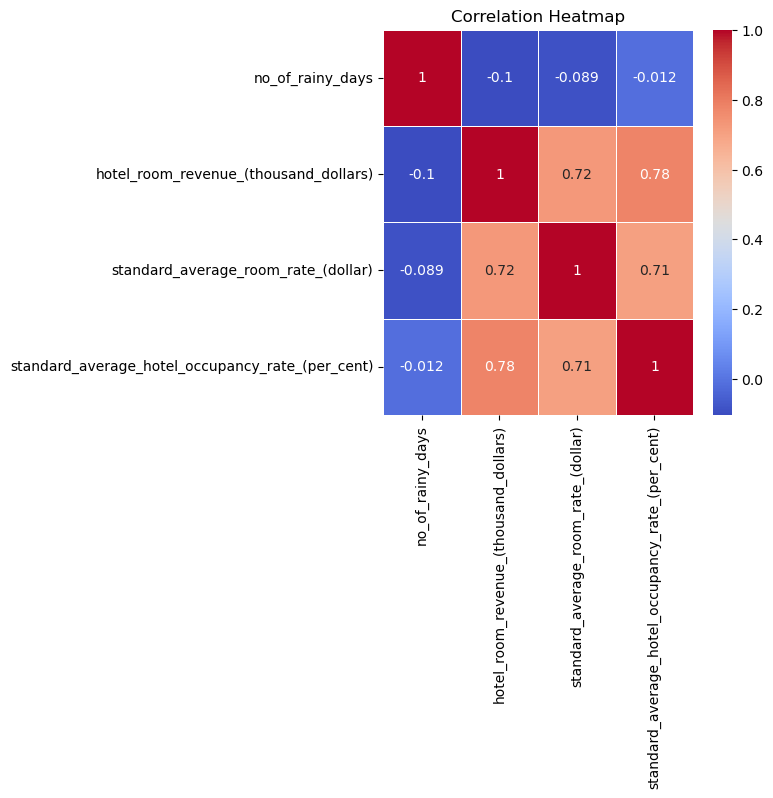

In [129]:
#heatmap

columns_to_plot = ['no_of_rainy_days', 'hotel_room_revenue_(thousand_dollars)','standard_average_room_rate_(dollar)','standard_average_hotel_occupancy_rate_(per_cent)']
heatmap_data = FINAL[columns_to_plot]
correlation_matrix = heatmap_data.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

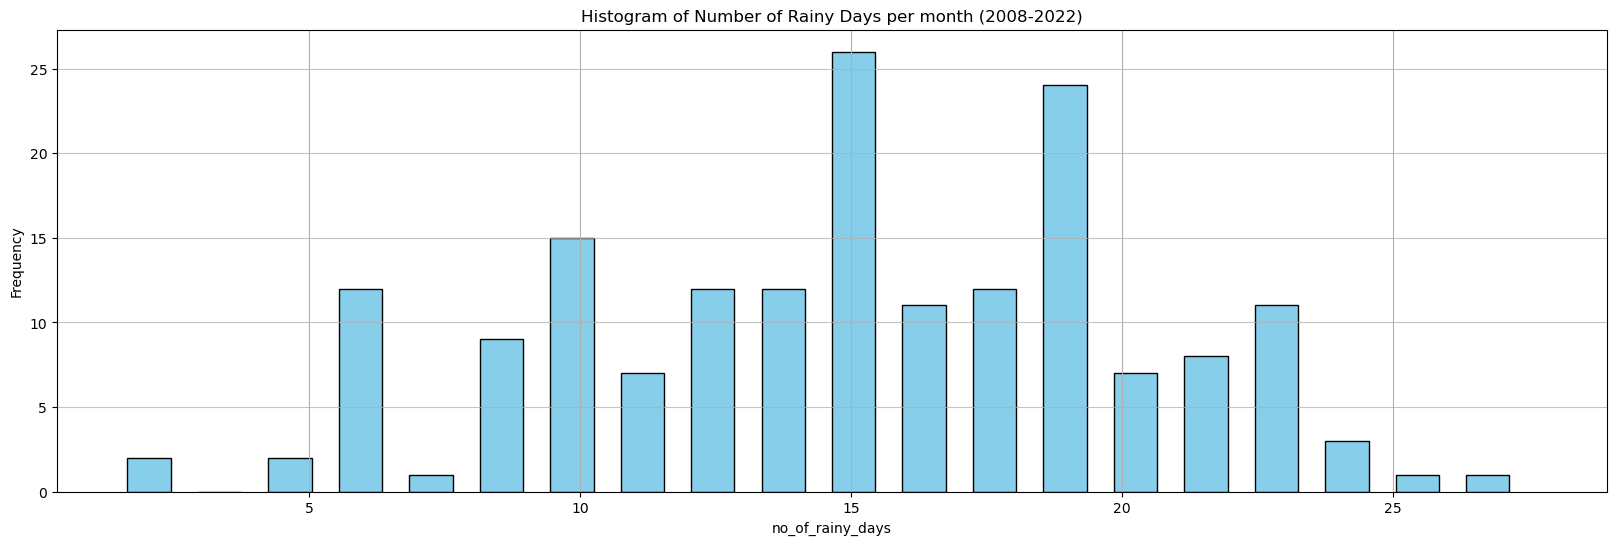

In [130]:
#histogram
column_name = 'no_of_rainy_days'

plt.figure(figsize=(20, 6))
FINAL[column_name].hist(bins=20, color='skyblue', edgecolor='black', width = 0.8, align = 'right')
plt.title(f'Histogram of Number of Rainy Days per month (2008-2022)')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [131]:
FINAL['month'] = pd.to_datetime(FINAL['month'], errors='coerce')



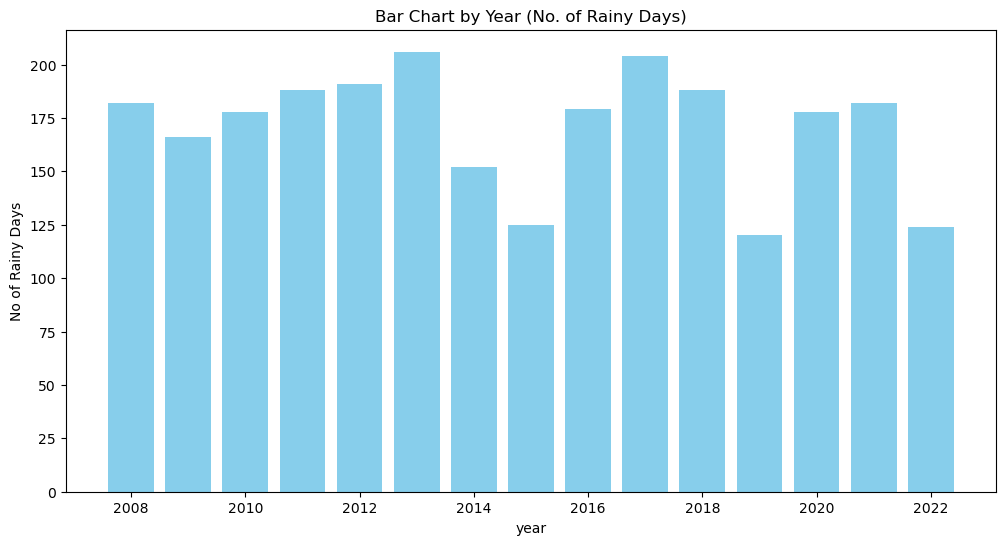

In [137]:
#barchart month to no rainy days by year 
FINAL = pd.read_csv('../data/merge.csv')
FINAL['month'] = pd.to_datetime(FINAL['month'], errors='coerce')
categories = ['month', 'no_of_rainy_days']
selected_data = FINAL[categories]

FINAL['year'] = FINAL['month'].dt.year
grouped_data = FINAL.groupby('year')['no_of_rainy_days'].sum().reset_index()
plt.figure(figsize=(12, 6))

# Plotting the bar chart
plt.bar(grouped_data['year'], grouped_data['no_of_rainy_days'], color='skyblue')

# Adding labels and title
plt.xlabel('year')
plt.ylabel('No of Rainy Days')
plt.title('Bar Chart by Year (No. of Rainy Days)')

# Display the plot
plt.show()

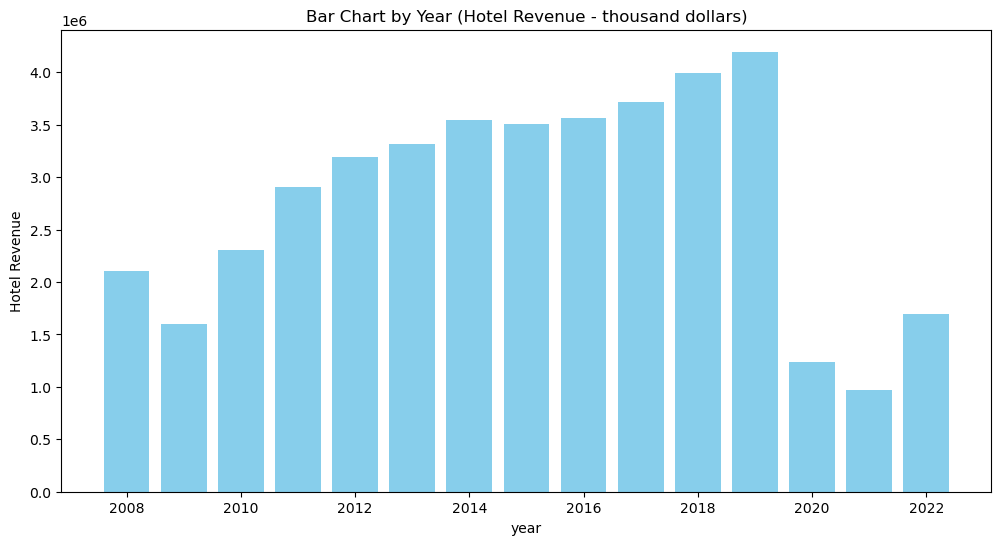

In [138]:
#barchart month to hotel rev by year 
FINAL = pd.read_csv('../data/merge.csv')
FINAL['month'] = pd.to_datetime(FINAL['month'], errors='coerce')
categories = ['month', 'hotel_room_revenue_(thousand_dollars)']
selected_data = FINAL[categories]

FINAL['year'] = FINAL['month'].dt.year
grouped_data = FINAL.groupby('year')['hotel_room_revenue_(thousand_dollars)'].sum().reset_index()
plt.figure(figsize=(12, 6))

# Plotting the bar chart
plt.bar(grouped_data['year'], grouped_data['hotel_room_revenue_(thousand_dollars)'], color='skyblue')

# Adding labels and title
plt.xlabel('year')
plt.ylabel('Hotel Revenue')
plt.title('Bar Chart by Year (Hotel Revenue - thousand dollars)')

# Display the plot
plt.show()

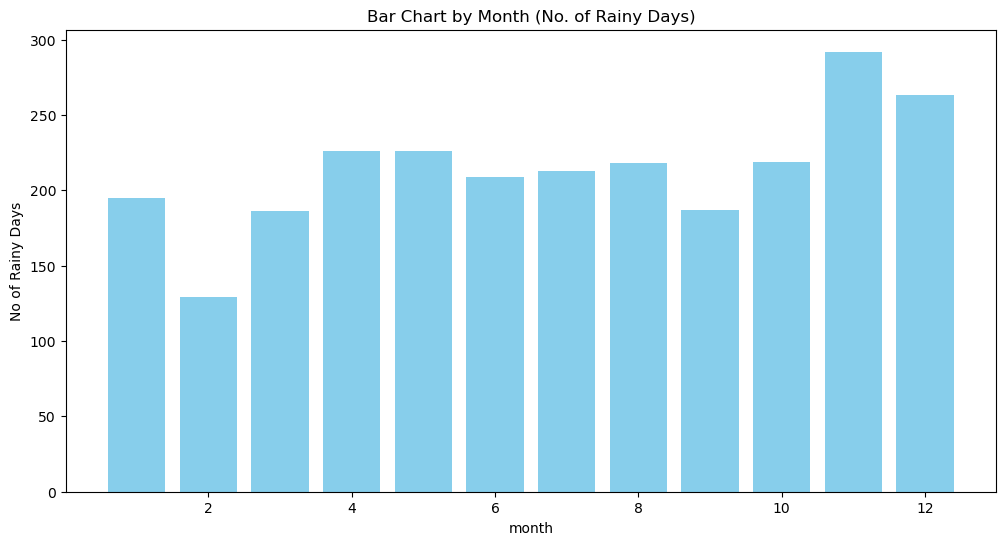

In [134]:
#barchart month to no rainy days by month 
#FINAL = pd.read_csv('../data/merge.csv')
#FINAL['month'] = pd.to_datetime(FINAL['month'], errors='coerce')
categories = ['month', 'no_of_rainy_days']
selected_data = FINAL[categories]

FINAL['month'] = FINAL['month'].dt.month
grouped_data = FINAL.groupby('month')['no_of_rainy_days'].sum().reset_index()
plt.figure(figsize=(12, 6))

# Plotting the bar chart
plt.bar(grouped_data['month'], grouped_data['no_of_rainy_days'], color='skyblue')

# Adding labels and title
plt.xlabel('month')
plt.ylabel('No of Rainy Days')
plt.title('Bar Chart by Month (No. of Rainy Days)')

# Display the plot
plt.show()

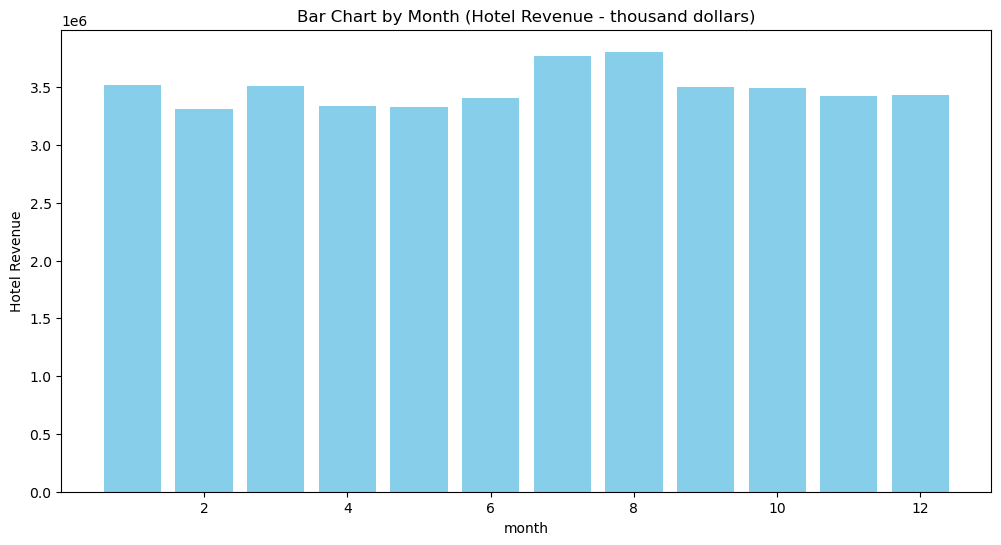

In [139]:
#barchart month to hotel rev by month 
FINAL = pd.read_csv('../data/merge.csv')
FINAL['month'] = pd.to_datetime(FINAL['month'], errors='coerce')
categories = ['month', 'hotel_room_revenue_(thousand_dollars)']
selected_data = FINAL[categories]

FINAL['month'] = FINAL['month'].dt.month
grouped_data = FINAL.groupby('month')['hotel_room_revenue_(thousand_dollars)'].sum().reset_index()
plt.figure(figsize=(12, 6))

# Plotting the bar chart
plt.bar(grouped_data['month'], grouped_data['hotel_room_revenue_(thousand_dollars)'], color='skyblue')

# Adding labels and title
plt.xlabel('month')
plt.ylabel('Hotel Revenue')
plt.title('Bar Chart by Month (Hotel Revenue - thousand dollars)')

# Display the plot
plt.show()

In [136]:
print(FINAL.columns)

Index(['month', 'hotel_room_revenue_(thousand_dollars)',
       'standard_average_room_rate_(dollar)',
       'average_room_rate _-_hotel_with_100_rooms_and_less_(dollar)',
       'average_room_rate_-_hotel_with_101_-_299_rooms_(dollar)',
       'average_room_rate_-_hotel_with_300_or_more_rooms_(dollar)',
       'standard_average_hotel_occupancy_rate_(per_cent)',
       'average_hotel_occupancy_rate_-_hotel_with_100_rooms_and_less_(per_cent)',
       'average_hotel_occupancy_rate_-_hotel_with_101_-_299_rooms_(per_cent)',
       'average_hotel_occupancy_rate_-_hotel_with_300_or_more_rooms_(per_cent)',
       'gross_lettings_(room-nights)_(number)',
       'available_room-nights_(number)', 'no_of_rainy_days'],
      dtype='object')


Text(0.5, 1.0, 'Bar Chart by Year (Hotel Avg Occupancy)')

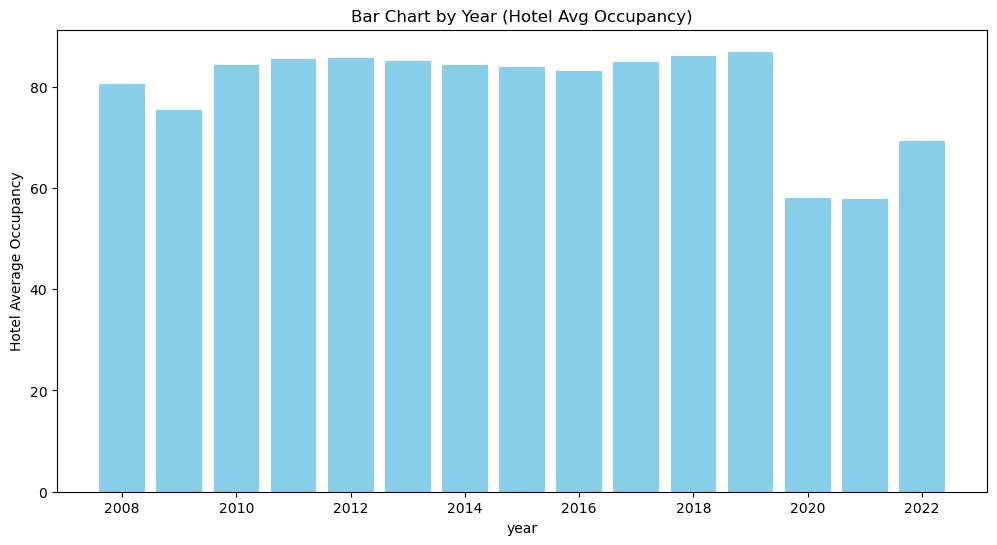

In [140]:
#barchart month to hotel occupancy by year 
FINAL = pd.read_csv('../data/merge.csv')
FINAL['month'] = pd.to_datetime(FINAL['month'], errors='coerce')
categories = ['month', 'standard_average_hotel_occupancy_rate_(per_cent)']
selected_data = FINAL[categories]
FINAL['year'] = FINAL['month'].dt.year
grouped_data = FINAL.groupby('year')['standard_average_hotel_occupancy_rate_(per_cent)'].mean()
plt.figure(figsize=(12, 6))

#Plotting the bar chart
plt.bar(grouped_data.index, grouped_data, color='skyblue')
# Adding labels and title
plt.xlabel('year')
plt.ylabel('Hotel Average Occupancy')
plt.title('Bar Chart by Year (Hotel Avg Occupancy)')


Text(0.5, 1.0, 'Bar Chart by Month (Hotel Avg Occupancy)')

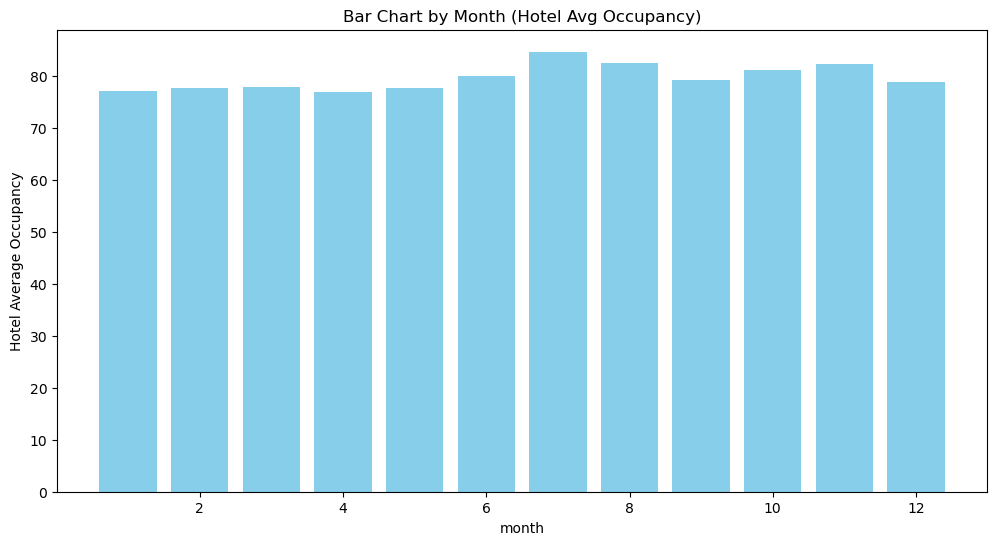

In [141]:
#hotel occupancy month
FINAL = pd.read_csv('../data/merge.csv')
FINAL['month'] = pd.to_datetime(FINAL['month'], errors='coerce')
categories = ['month', 'standard_average_hotel_occupancy_rate_(per_cent)']
selected_data = FINAL[categories]
FINAL['month'] = FINAL['month'].dt.month
grouped_data = FINAL.groupby('month')['standard_average_hotel_occupancy_rate_(per_cent)'].mean()
plt.figure(figsize=(12, 6))

#Plotting the bar chart
plt.bar(grouped_data.index, grouped_data, color='skyblue')
# Adding labels and title
plt.xlabel('month')
plt.ylabel('Hotel Average Occupancy')
plt.title('Bar Chart by Month (Hotel Avg Occupancy)')

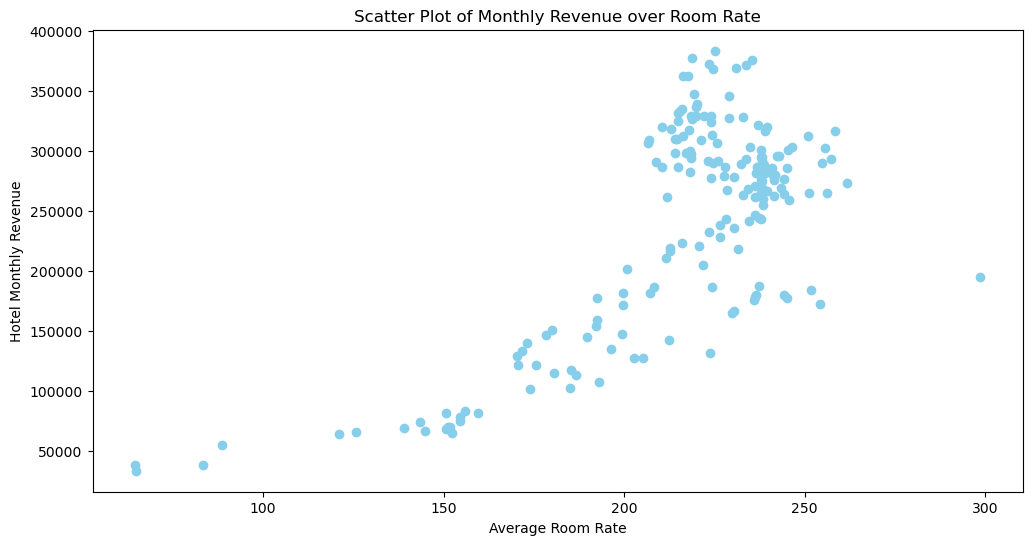

In [47]:
#stand avg room rate vs revenue
plt.figure(figsize=(12, 6))

# Plotting the scatter plot
plt.scatter(FINAL['standard_average_room_rate_(dollar)'], FINAL['hotel_room_revenue_(thousand_dollars)'], color='skyblue')

# Adding labels and title
plt.ylabel('Hotel Monthly Revenue')
plt.xlabel('Average Room Rate')
plt.title('Scatter Plot of Monthly Revenue over Room Rate')

# Display the plot
plt.show()

## Conclusions and Recommendations

Problem Statement
Weather in Singapore is largely sunny or rainy. As a country whos economy is heavily reliant on tourism, I have been tasked with analysing how Singapore's weather affects the hotel industry, in order for hotels to make better pricing decisions throughout the year. 

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

From the histogram of the number of rainy days, we can see that the number of days of rainfall we can expect in Singapore each month should roughly be between 10-20 days, which is a significant portion of the month. Hence, this has the potential to greatly affect the hotel's business, and is worth analysing.

Looking at the bar chart of Number of Rainy Days by Year, there is no noticeable trend of increasing or decreasing over the past 14 years, so it is safe to expect similar numbers in the future, and make business decisions based on the expectation of the number of rainy days annually to be between 150 and 180.

When looking at Hotel Revenue by Year, we can observe a strong increasing trend prior to 2018, where there was a large drop in revenue, most likely due to Covid restrictions on international travel. As the world has adjusted to covid, international travel is slowly resuming, and we might expect to see a greater increase in revenue in the future. 

When looking at Number of Rainy Days by Month, we observe that it is quite uniform throughout the year, except the months of November and December. At the year end, this might be a period where travelling is at its peak as well.

However, when we look at the Hotel Revenue by Month, it appears that the revenue generated is quite consistent throughout the year. 

Looking at the Hotel Occupancy by Year, we can see that the levels of occupancy have been around the same numbers over the years as well, except the covid years. Referring back to the earlier chart of Hotel Revenue by Year which had a strong increasing trend, this could suggest that the biggest factor behind revenue is not the occupancy levels.

So instead, we look at the graph of Monthly Revenue and Average Room Rate. The scatter plot shows a large concentration between a room rate of 200-250, with high monthly revenues of 250000-400000. With no other price range even generating revenue close to 300000, it could be an indication that that is the price range which hotels should target, and maybe focus on providing better service or comfort in order to differentiate themselves from competitors, as reducing price is unlikely to yield results. 

In conclusion: the number of rainy days seems to not have a significant impact on the number of tourists staying in Singapore's hotels, which could be due to the fact that the amount of rainy days does not vary greatly in Singapore throughout the year. Time periods also do not seem to play a major role in customers staying in hotels. The biggest factor is in fact room prices, where tourists are most likely to pay for rooms priced between 200-250. This could be a sign of the wealth level of tourists who visit Singapore, which admittedly has a high cost of living, and it could also imply that when looking at hotels, tourists prioritise comfort and quality over cheap pricing. Hence, if the hotel is looking to expand grow their business, they should look at targeting the middle to upper class tier in terms of pricing. 

Another point worth noting is there are other increasingly popular accomodation options like airbnb, which could significantly affect the hotel industry in the future. It is definitely an area that should be analysed. 

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!